In [36]:
%pip install librosa
%pip install matplotlib
%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
from tqdm import tqdm
import os
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from xgboost import XGBClassifier
import librosa
librosa.display
%matplotlib inline

In [38]:
filename='Baby Cry Sence Dataset\scared\generated3_b6911857-98b7-4bd7-86b9-7dec90fbd897-1431351785422-1.7-m-72-sc.wav'

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15476\884796040.py:1: SyntaxWarning: invalid escape sequence '\s'
  filename='Baby Cry Sence Dataset\scared\generated3_b6911857-98b7-4bd7-86b9-7dec90fbd897-1431351785422-1.7-m-72-sc.wav'


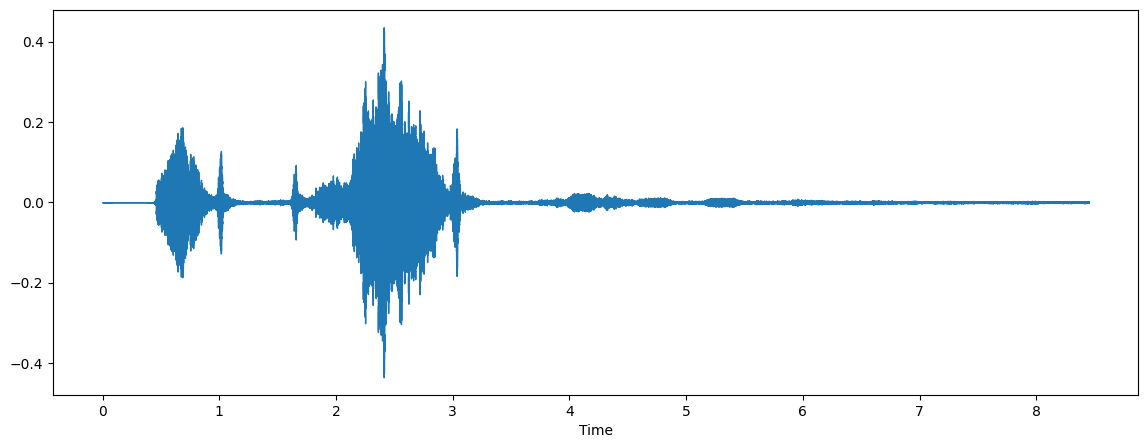

In [39]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [40]:

DATA_DIR = "Baby Cry Sence Dataset"
rows = []

for label in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, label)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.endswith(".wav"):
                file_path = os.path.join(class_path, file)
                print("Processing:", file_path)
                
                y, sr = librosa.load(file_path, sr=None)
                
                mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
                mfccs_mean = mfccs.mean(axis=1)  
                
                zcr = librosa.feature.zero_crossing_rate(y).mean()
                spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
                
                features = list(mfccs_mean) + [zcr, spec_centroid, label]
                rows.append(features)

mfcc_columns = [f"mfcc_{i+1}" for i in range(13)]
columns = mfcc_columns + ["zcr", "spectral_centroid", "label"]

df = pd.DataFrame(rows, columns=columns)
df.to_csv("baby_activity_features.csv", index=False)


Processing: Baby Cry Sence Dataset\belly_pain\549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav
Processing: Baby Cry Sence Dataset\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138495-1.0-m-72-bp.wav
Processing: Baby Cry Sence Dataset\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138506-1.0-m-72-bp.wav
Processing: Baby Cry Sence Dataset\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138514-1.0-m-72-bp.wav
Processing: Baby Cry Sence Dataset\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138524-1.0-m-72-bp.wav
Processing: Baby Cry Sence Dataset\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138536-1.0-m-72-bp.wav
Processing: Baby Cry Sence Dataset\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138545-1.0-m-72-bp.wav
Processing: Baby Cry Sence Dataset\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138591-1.0-m-72-bp.wav
Processing: Baby Cry Sence Dataset\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138647-1.0-m-72-bp.wav
Process

In [41]:
audio_dataset_path='Baby Cry Sence Dataset'
metadata=pd.read_csv('baby_activity_features.csv')
metadata.head()


,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,zcr,spectral_centroid,label
0,-405.87600,27.121643,-42.248203,-0.346938,-33.404630,4.665828,-17.678110,2.775190,-8.659680,-9.639955,-9.528886,2.925496,12.073723,0.247767,1334.357680,belly_pain
1,-383.83685,38.426846,-19.573414,-8.295807,-19.087880,-19.339636,-16.694020,-14.295870,-14.658416,-14.466269,-15.466559,-7.020199,-10.439179,0.206827,1277.555415,belly_pain
2,-304.17505,41.778366,-26.645771,-17.834066,-29.084251,-16.714413,-19.668499,-15.114859,-17.234325,-9.661561,-10.691089,-6.565115,-10.446559,0.214822,1267.807356,belly_pain
3,-252.53748,35.876537,-35.229088,-20.087470,-29.121030,-21.324640,-22.387121,-8.064095,-21.706665,-13.885673,-8.505555,-0.132468,-0.643279,0.235138,1305.510591,belly_pain
4,-171.50912,41.750740,-15.136597,-21.789590,-37.224900,-26.083994,-20.842268,-14.546901,-14.981940,-10.887066,-10.158533,-4.346590,-6.528756,0.207053,1243.462319,belly_pain


In [42]:
X = metadata.drop("label", axis=1).values   # all numeric columns
y = metadata["label"].values                # class labels

print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)
print("Unique labels:", np.unique(y))


Feature matrix shape: (512, 15)
Labels shape: (512,)
Unique labels: ['belly_pain' 'burping' 'cold_hot' 'discomfort' 'hungry' 'lonely' 'scared'
 'tired']


In [43]:

# 2. Split features and labels
X = df.drop("label", axis=1).values   # MFCCs + ZCR + Spectral Centroid
y = df["label"].values                # Activity labels

# 3. Encode labels into numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Train/Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 5. Define XGBoost model
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

# 6. Train model
model.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:04:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [44]:
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:

              precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00         3
     burping       1.00      0.25      0.40         4
    cold_hot       1.00      1.00      1.00         1
  discomfort       1.00      0.33      0.50         6
      hungry       0.85      1.00      0.92        77
      lonely       0.50      1.00      0.67         2
      scared       1.00      1.00      1.00         4
       tired       0.00      0.00      0.00         6

    accuracy                           0.84       103
   macro avg       0.67      0.57      0.56       103
weighted avg       0.79      0.84      0.79       103



c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

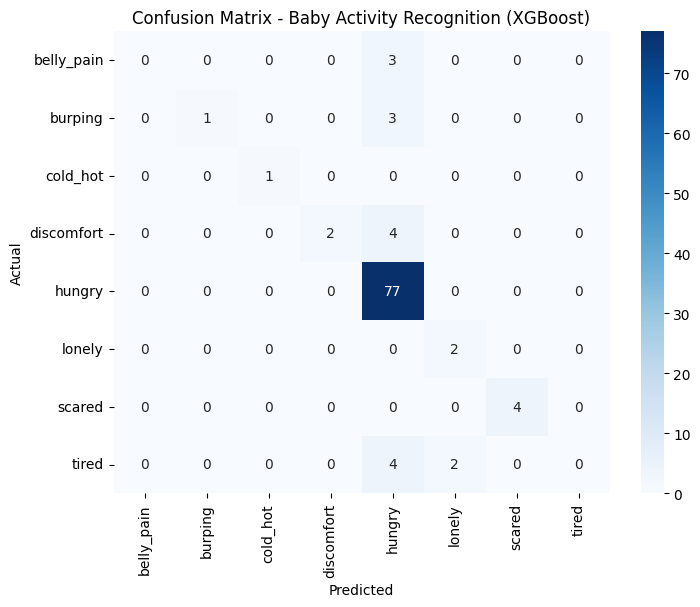

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baby Activity Recognition (XGBoost)")
plt.show()

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 84.46601941747572 %


In [47]:

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc * 100, "%")


Balanced Accuracy: 57.291666666666664 %


In [48]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:

              precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00         3
     burping       1.00      0.25      0.40         4
    cold_hot       1.00      1.00      1.00         1
  discomfort       1.00      0.33      0.50         6
      hungry       0.85      1.00      0.92        77
      lonely       0.50      1.00      0.67         2
      scared       1.00      1.00      1.00         4
       tired       0.00      0.00      0.00         6

    accuracy                           0.84       103
   macro avg       0.67      0.57      0.56       103
weighted avg       0.79      0.84      0.79       103



c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [53]:
joblib.dump(model, "baby_xgb_model.pkl")

joblib.dump(le, "label_encoder.pkl")

    

['label_encoder.pkl']

In [61]:

# Load saved model and encoder
model = joblib.load("baby_xgb_model.pkl")
le = joblib.load("label_encoder.pkl")

# Feature extraction function
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = mfccs.mean(axis=1)
    
    # Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y).mean()
    
    # Spectral Centroid
    spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    
    # Combine into feature vector
    features = np.array(list(mfccs_mean) + [zcr, spec_centroid]).reshape(1, -1)
    return features

# 🔹 Predict single file
file_path = "Baby Cry Sence Dataset/scared/5f651112-d2a3-4911-b3a5-f37bfc092494-1430734603484-1.7-m-72-sc.wav" 
features = extract_features(file_path)

y_pred = model.predict(features)
pred_label = le.inverse_transform(y_pred)[0]

print("Predicted class:", pred_label)


Predicted class: scared


In [54]:

total_size = 0
for root, dirs, files in os.walk(DATA_DIR):
    for f in files:
        if f.endswith(".wav"):
            total_size += os.path.getsize(os.path.join(root, f))

print("Dataset size on disk:", round(total_size / (1024*1024), 2), "MB")


Dataset size on disk: 113.86 MB


In [58]:
df["label"].value_counts()


label
hungry        382
discomfort     30
tired          28
scared         20
burping        18
belly_pain     16
lonely         11
cold_hot        7
Name: count, dtype: int64